In [2]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import mixture#.mixture import GMM

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('clustering.csv')


## Load Data
dfa = pd.read_csv("data.csv")
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))

# a) K-Means clustering from scratch

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
data = data[['ApplicantIncome', 'LoanAmount']]
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
X = data.values

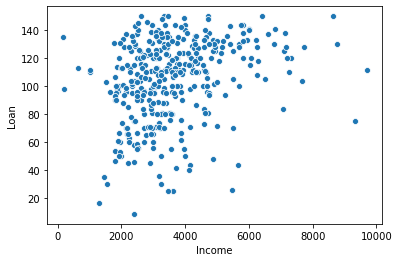

In [5]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [6]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [7]:
def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
    # for each observation
    for i, row in enumerate(X):
        mn_dist = float('inf')
        # dist of the point from all centroids
        for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
    else:
        centroids = new_centroids
  return centroids, cluster

In [8]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

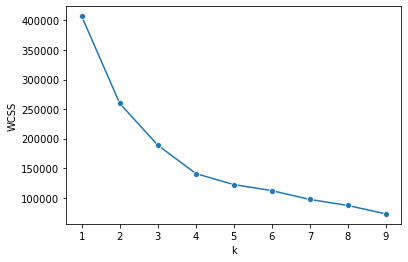

In [9]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

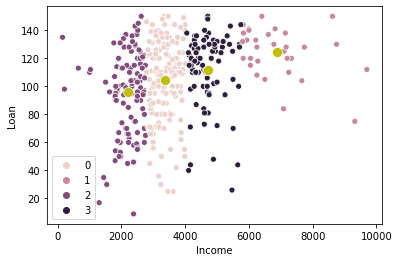

In [10]:
k = 4
centroids, cluster = kmeans(X, k)
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

# b) Hierarchical clustering (not from scratch)

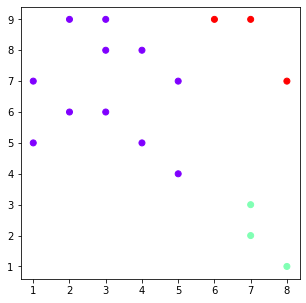

In [11]:
# heirarchical clustering 
# data
a, b, c, d, e = (3,9), (3,8), (4,8), (2,9), (5,7)

f,g,h,i,j,k=(2,6), (3,6), (4,5), (1,7), (1,5), (5,4)
l,m,n,o,p,q=(6,9),(7,9),(8,7),(7,3),(7,2),(8,1)
data = np.array([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q])

#data = np.array([(2,6),(3,7),(5,8),(5,5),(6,6),(2,2),(5,2),(7,3),(8,4),(10,6),(12,8)])  

# average link
avg_link_cluster = AgglomerativeClustering(n_clusters=3, linkage='average').fit(data)
plt.figure(figsize=(5,5))
plt.scatter(data[:,0], data[:,1], c=avg_link_cluster.labels_, cmap='rainbow')
plt.show()

# c) Gaussian mixture models clustering (not from scratch)

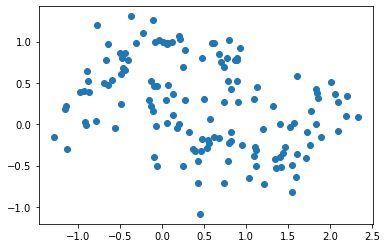

In [13]:
# GMM
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(138, noise=.2, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

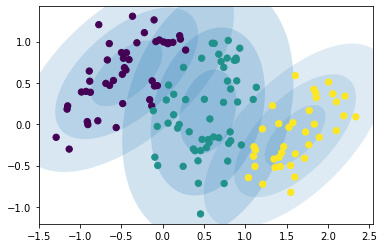

In [14]:
gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=0)

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
plot_gmm(gmm, Xmoon)

# d) DB Scan clustering (not from scratch) using pycaret library 

In [23]:
from pycaret.datasets import get_data
data = get_data('jewellery')


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [28]:
from pycaret.clustering import *
clu1 = setup(data, normalize=True, session_id=123)

,Description,Value
0,session_id,123
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(505, 4)"
9,CPU Jobs,-1


In [29]:
kmeans = create_model('kmeans')
print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2649,0.3743,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [32]:
plot_model(kmeans)

In [31]:
dbscan = create_model("dbscan")
print(dbscan)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3582,0.2762,0,0,0


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)


In [33]:
plot_model(dbscan)

# dbscan with sklearn

In [18]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples=400, centers=centers, 
                  cluster_std=0.5, random_state=0)
#Normalize the values
X = StandardScaler().fit_transform(X)

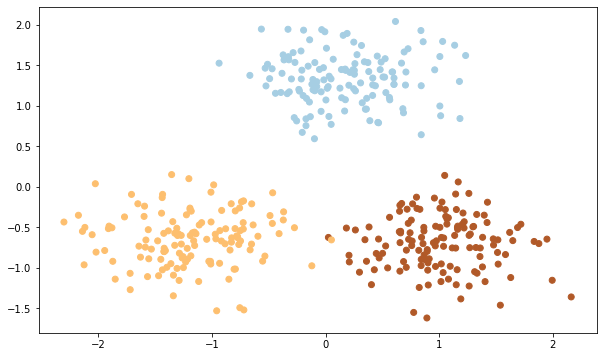

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

In [21]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(X)

DBSCAN(eps=0.4, min_samples=20)

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

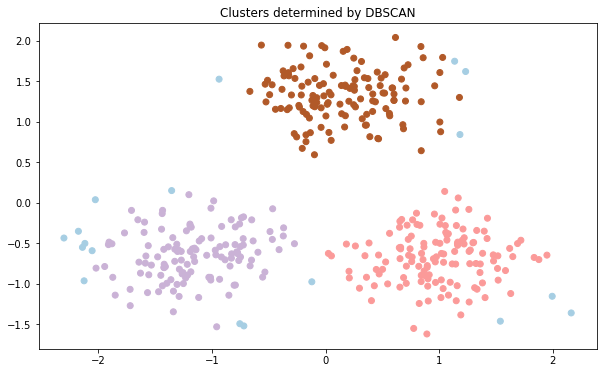

In [22]:
y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")